# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [9]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')

In [10]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [15]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [17]:
# Convert categorical features to category type
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [21]:
# Calculate time taken in minutes
df['total_delivery_time_mins'] = (df['actual_delivery_time']- df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [23]:
df['hour_order_created'] = df['created_at'].dt.hour

In [24]:
df['day_order_created'] = df['created_at'].dt.dayofweek

In [25]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,total_delivery_time_mins,hour_order_created,day_order_created
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,1
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,3
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,1


In [26]:
# Extract the hour and day of week from the 'created_at' timestamp


# Create a categorical feature 'isWeekend'

df['isWeekend'] = df['day_order_created'] > 5

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [28]:
df['isWeekend'] = df['isWeekend'].astype(int)

In [29]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,total_delivery_time_mins,hour_order_created,day_order_created,isWeekend
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,4,0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,1,0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,3,0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,1,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [31]:
# Drop unnecessary columns
df = df.drop(columns=['actual_delivery_time','created_at'])

In [32]:
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,total_delivery_time_mins,hour_order_created,day_order_created,isWeekend
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,4,0
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,1,0
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0,0
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,3,0
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,1,0


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [35]:
# Define target variable (y) and features (X)
X = df.drop(columns=['total_delivery_time_mins'])
y = df['total_delivery_time_mins']

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [37]:
# Split data into training and testing sets
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  float64 
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   total_items               140621 non-null  int64   
 4   subtotal                  140621 non-null  int64   
 5   num_distinct_items        140621 non-null  int64   
 6   min_item_price            140621 non-null  int64   
 7   max_item_price            140621 non-null  int64   
 8   total_onshift_dashers     140621 non-null  float64 
 9   total_busy_dashers        140621 non-null  float64 
 10  total_outstanding_orders  140621 non-null  float64 
 11  distance                  140621 non-null  float64 
 12  hour_order_created        140621 non-null  int32   
 13  day_order_created         140

In [41]:
X_train['isWeekend'] = X_train['isWeekend'].astype('category')

In [42]:
# Define numerical and categorical columns for easy EDA and data manipulation
categorical_columns = ['store_primary_category','order_protocol','isWeekend']
numerical_columns = ['market_id','total_items','subtotal','num_distinct_items','min_item_price','max_item_price','total_outstanding_orders','distance','hour_order_created','day_order_created','total_onshift_dashers','total_busy_dashers']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

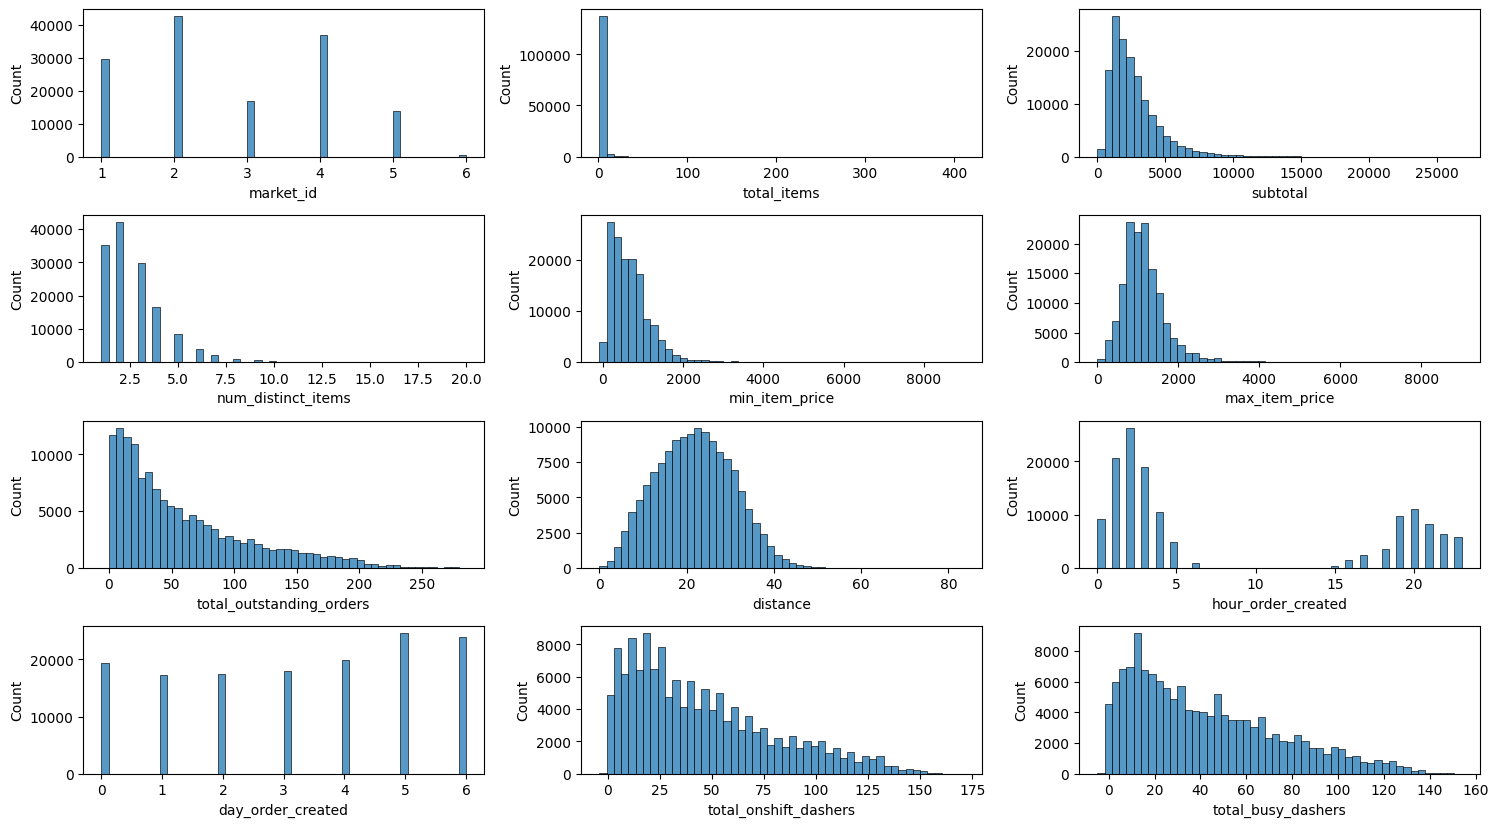

In [44]:
plt.figure(figsize=(15, 10))
for i, j in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.histplot(X_train[j],bins=50)
plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [46]:
X_train['store_primary_category'].unique()

[45, 20, 36, 39, 6, ..., 19, 27, 43, 8, 3]
Length: 72
Categories (73, int64): [0, 1, 2, 3, ..., 69, 70, 71, 72]

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  float64 
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   total_items               140621 non-null  int64   
 4   subtotal                  140621 non-null  int64   
 5   num_distinct_items        140621 non-null  int64   
 6   min_item_price            140621 non-null  int64   
 7   max_item_price            140621 non-null  int64   
 8   total_onshift_dashers     140621 non-null  float64 
 9   total_busy_dashers        140621 non-null  float64 
 10  total_outstanding_orders  140621 non-null  float64 
 11  distance                  140621 non-null  float64 
 12  hour_order_created        140621 non-null  int32   
 13  day_order_created         140

In [48]:
X_train['isWeekend'] = X_train['isWeekend'].astype('category')

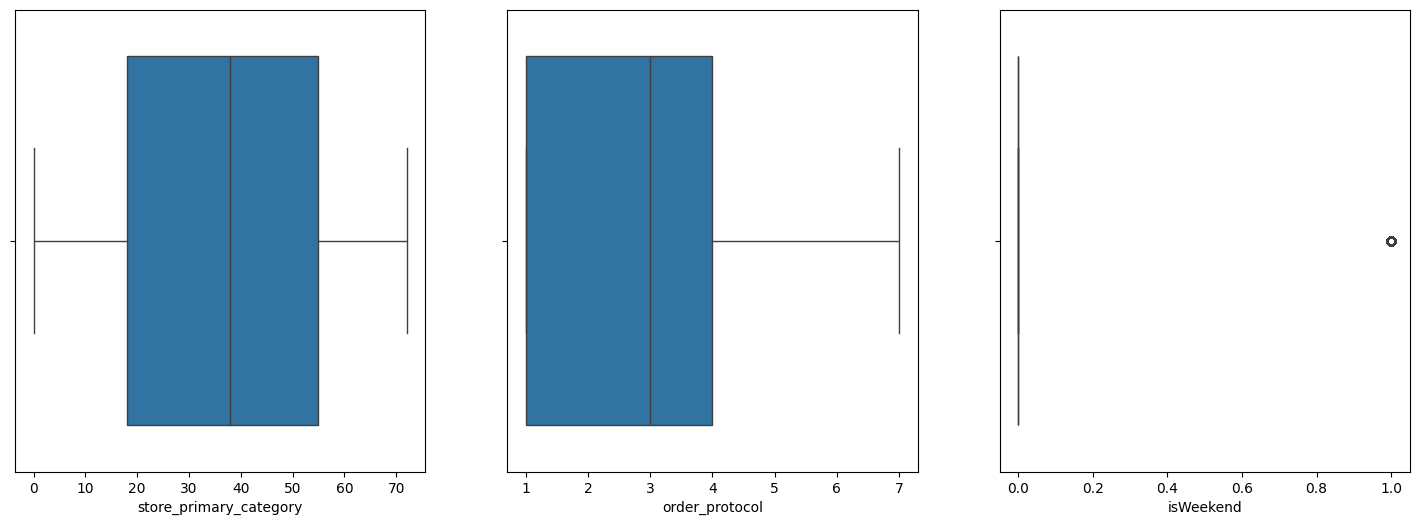

In [49]:
# Distribution of categorical columns
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data=X_train, x='store_primary_category')

plt.subplot(1, 3, 2)
sns.boxplot(data=X_train, x='order_protocol')

plt.subplot(1, 3, 3)
sns.boxplot(data=X_train, x='isWeekend')
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [51]:
X_train.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour_order_created,day_order_created,isWeekend
102712,2.0,45,2.0,1,820,1,745,745,35.0,39.0,56.0,30.32,21,1,0
94576,4.0,20,3.0,1,995,1,995,995,110.0,72.0,116.0,31.16,2,4,0
49784,1.0,36,3.0,4,2040,4,150,895,6.0,3.0,7.0,18.16,21,4,0
37753,3.0,39,1.0,2,2376,2,579,1399,16.0,17.0,19.0,33.44,3,1,0
91728,2.0,6,1.0,1,1430,1,1320,1320,64.0,47.0,52.0,31.56,21,4,0


In [52]:
y_train_df = y_train.to_frame()

In [53]:
y_train_df

,total_delivery_time_mins
102712,45.0
94576,43.0
49784,46.0
37753,51.0
91728,37.0
...,...
119879,43.0
103694,44.0
131932,40.0
146867,50.0


<Axes: xlabel='total_delivery_time_mins', ylabel='Count'>

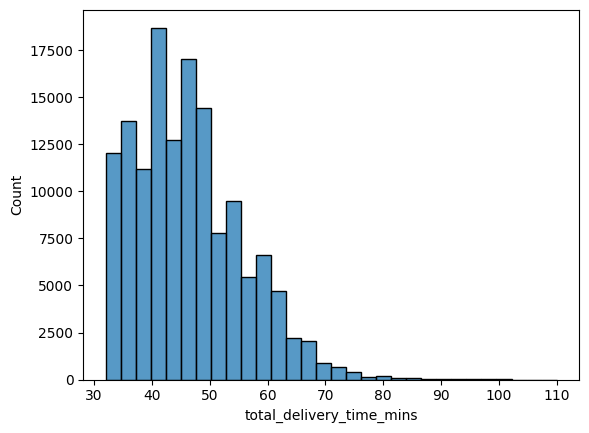

In [54]:
# Distribution of time_taken
sns.histplot(y_train_df['total_delivery_time_mins'],bins=30)


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

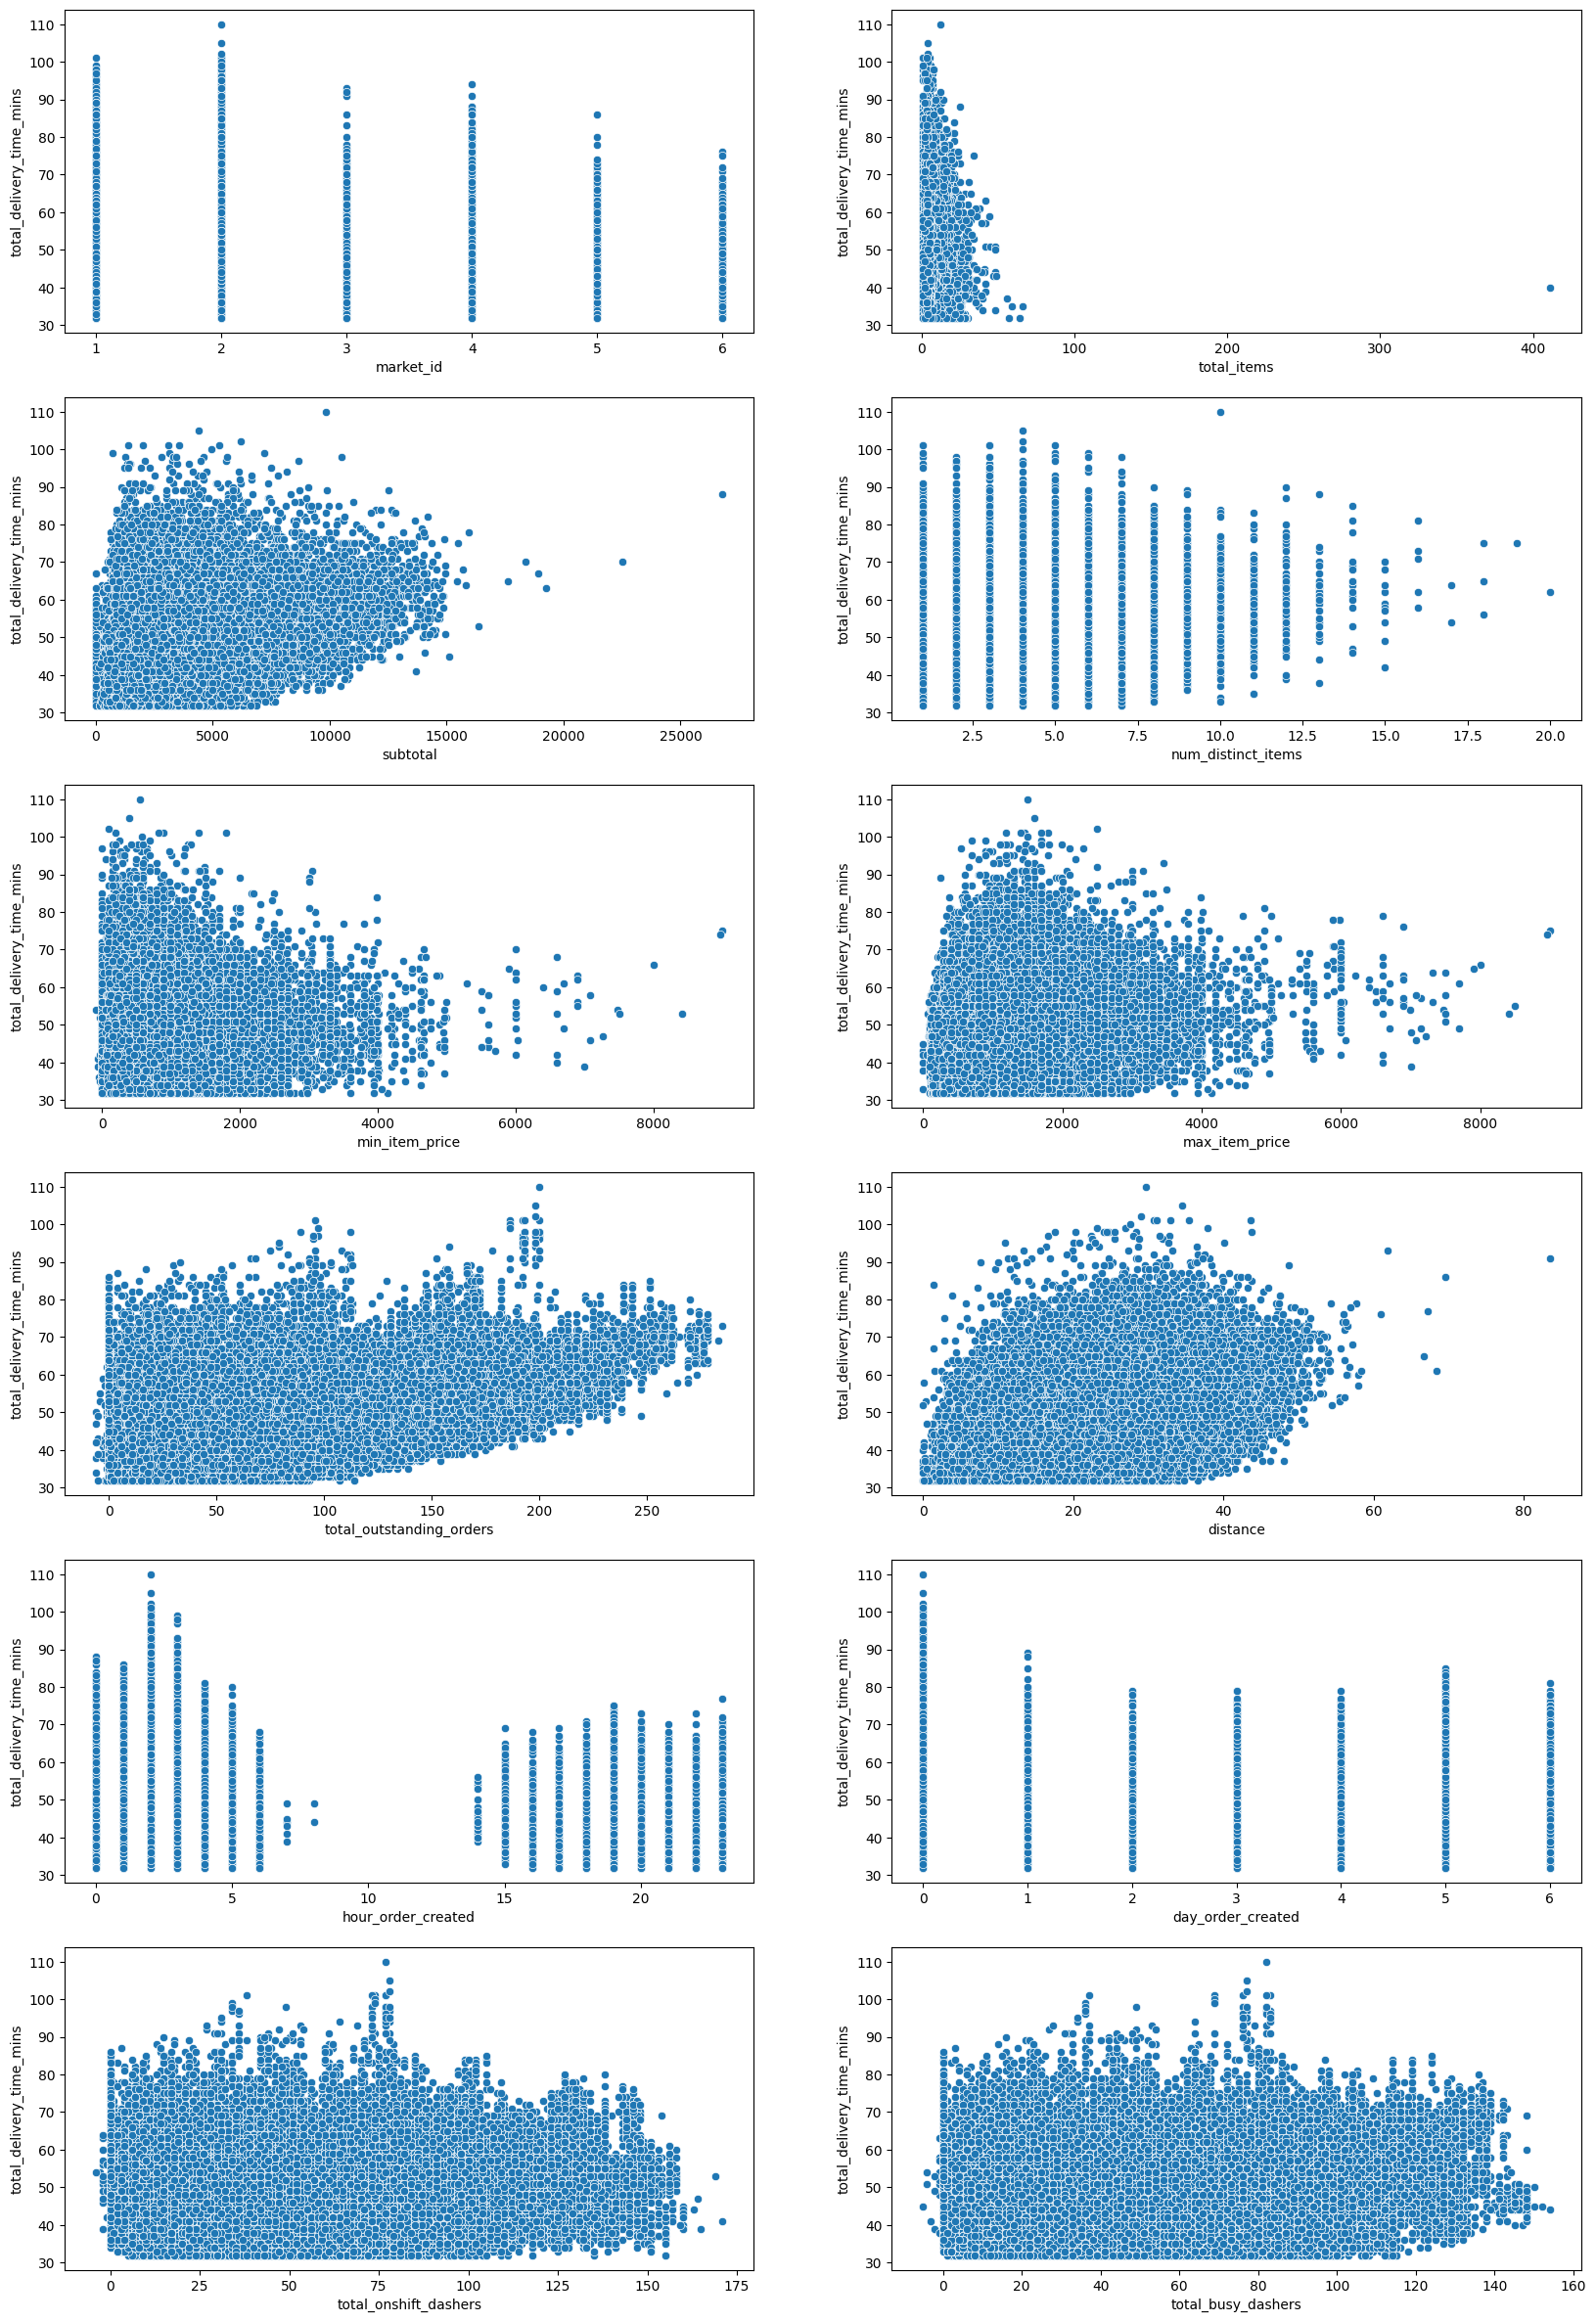

In [57]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(6, 2, i)
    sns.scatterplot(x = X_train[col], y = y_train_df['total_delivery_time_mins'])
plt.show()


<Axes: xlabel='hour_order_created', ylabel='total_delivery_time_mins'>

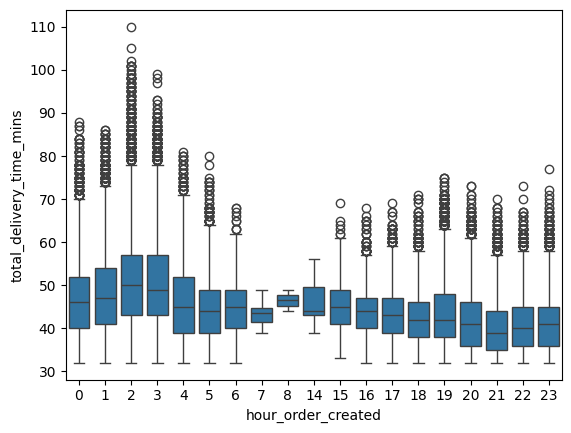

In [58]:
# Show the distribution of time_taken for different hours
sns.boxplot(x=X_train['hour_order_created'], y=y_train_df['total_delivery_time_mins'])


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [61]:
x_train_combined = pd.concat([X_train, y_train_df], axis=1)

In [62]:
x_train_combined

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour_order_created,day_order_created,isWeekend,total_delivery_time_mins
102712,2.0,45,2.0,1,820,1,745,745,35.0,39.0,56.0,30.32,21,1,0,45.0
94576,4.0,20,3.0,1,995,1,995,995,110.0,72.0,116.0,31.16,2,4,0,43.0
49784,1.0,36,3.0,4,2040,4,150,895,6.0,3.0,7.0,18.16,21,4,0,46.0
37753,3.0,39,1.0,2,2376,2,579,1399,16.0,17.0,19.0,33.44,3,1,0,51.0
91728,2.0,6,1.0,1,1430,1,1320,1320,64.0,47.0,52.0,31.56,21,4,0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,2.0,58,5.0,1,1111,1,1111,1111,31.0,31.0,34.0,37.04,23,6,1,43.0
103694,2.0,24,1.0,4,2880,3,495,795,95.0,80.0,111.0,27.72,3,2,0,44.0
131932,6.0,46,5.0,2,1799,2,300,899,18.0,18.0,15.0,21.92,1,1,0,40.0
146867,5.0,36,2.0,10,4015,4,195,850,26.0,24.0,28.0,23.60,3,5,0,50.0


In [63]:
corr_matrix = x_train_combined.corr()
time_taken_corr = corr_matrix['total_delivery_time_mins']

In [64]:
time_taken_corr

market_id                  -0.075067
store_primary_category      0.026388
order_protocol             -0.138070
total_items                 0.220804
subtotal                    0.413392
num_distinct_items          0.312510
min_item_price              0.021151
max_item_price              0.254650
total_onshift_dashers       0.171828
total_busy_dashers          0.206514
total_outstanding_orders    0.385028
distance                    0.461026
hour_order_created         -0.345716
day_order_created           0.044897
isWeekend                   0.058500
total_delivery_time_mins    1.000000
Name: total_delivery_time_mins, dtype: float64

In [65]:
time_taken_corr_df = time_taken_corr.to_frame()

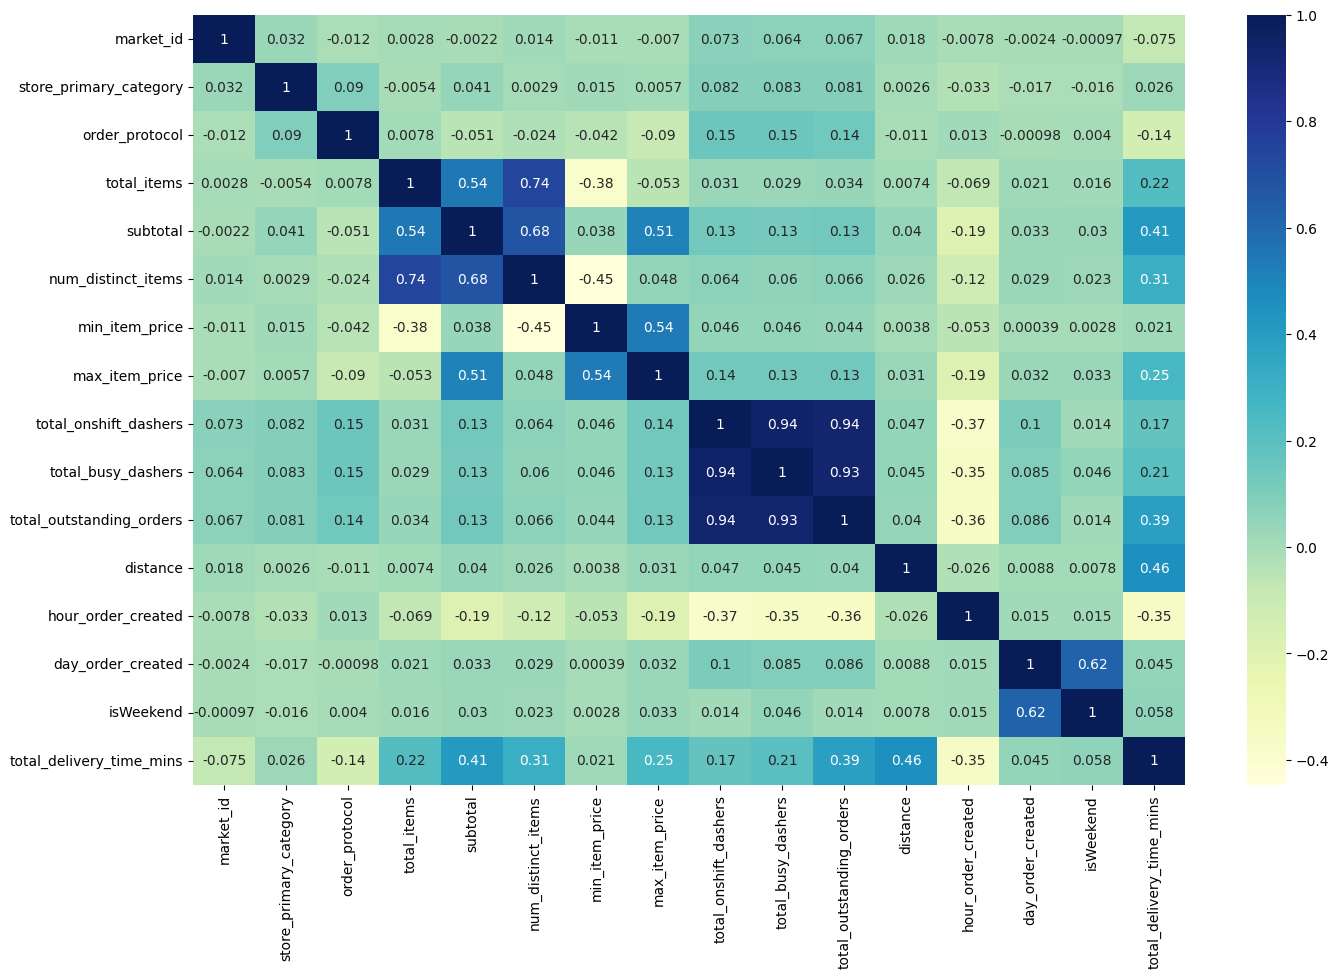

In [66]:
plt.figure(figsize = (16, 10))
sns.heatmap(corr_matrix, annot = True, cmap="YlGnBu")
plt.show()

In [67]:
time_taken_corr_df

,total_delivery_time_mins
market_id,-0.075067
store_primary_category,0.026388
order_protocol,-0.138070
total_items,0.220804
subtotal,0.413392
num_distinct_items,0.312510
min_item_price,0.021151
max_item_price,0.254650
total_onshift_dashers,0.171828
total_busy_dashers,0.206514


In [68]:
time_taken_corr_df.sort_values(by='total_delivery_time_mins')

,total_delivery_time_mins
hour_order_created,-0.345716
order_protocol,-0.138070
market_id,-0.075067
min_item_price,0.021151
store_primary_category,0.026388
day_order_created,0.044897
isWeekend,0.058500
total_onshift_dashers,0.171828
total_busy_dashers,0.206514
total_items,0.220804


<Axes: >

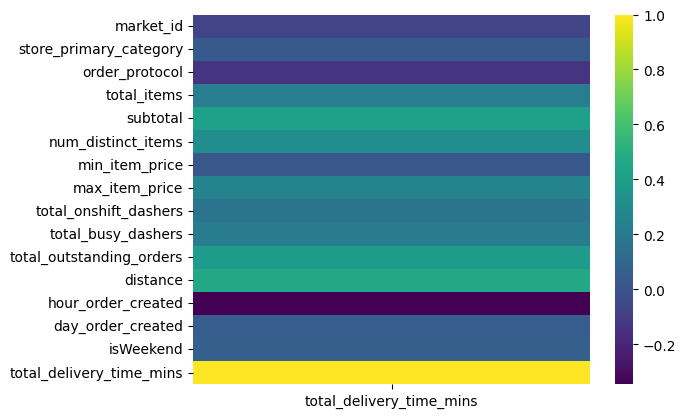

In [69]:
# Plot the heatmap of the correlation matrix
sns.heatmap(time_taken_corr_df,cmap='viridis')


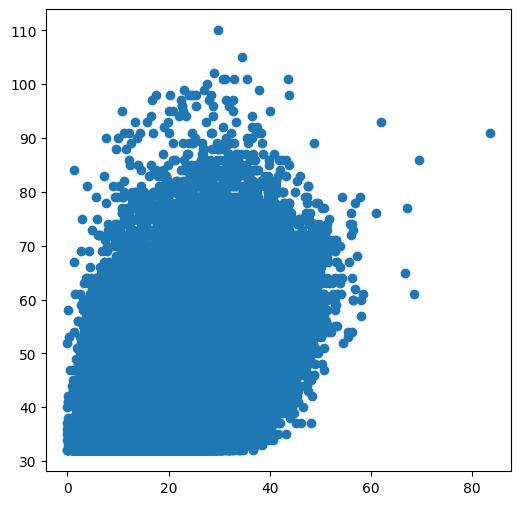

In [70]:
plt.figure(figsize=[6,6])
plt.scatter(x_train_combined.distance, x_train_combined.total_delivery_time_mins)
plt.show()

In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  float64 
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   total_items               140621 non-null  int64   
 4   subtotal                  140621 non-null  int64   
 5   num_distinct_items        140621 non-null  int64   
 6   min_item_price            140621 non-null  int64   
 7   max_item_price            140621 non-null  int64   
 8   total_onshift_dashers     140621 non-null  float64 
 9   total_busy_dashers        140621 non-null  float64 
 10  total_outstanding_orders  140621 non-null  float64 
 11  distance                  140621 non-null  float64 
 12  hour_order_created        140621 non-null  int32   
 13  day_order_created         140

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [73]:
# Drop 3-5 weakly correlated columns from training dataset
X_train = X_train.drop(['min_item_price','day_order_created','market_id','store_primary_category','day_order_created'],axis=1)


In [74]:
X_train = X_train.drop(['isWeekend'],axis=1)

In [75]:
X_train 

,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour_order_created
102712,2.0,1,820,1,745,35.0,39.0,56.0,30.32,21
94576,3.0,1,995,1,995,110.0,72.0,116.0,31.16,2
49784,3.0,4,2040,4,895,6.0,3.0,7.0,18.16,21
37753,1.0,2,2376,2,1399,16.0,17.0,19.0,33.44,3
91728,1.0,1,1430,1,1320,64.0,47.0,52.0,31.56,21
...,...,...,...,...,...,...,...,...,...,...
119879,5.0,1,1111,1,1111,31.0,31.0,34.0,37.04,23
103694,1.0,4,2880,3,795,95.0,80.0,111.0,27.72,3
131932,5.0,2,1799,2,899,18.0,18.0,15.0,21.92,1
146867,2.0,10,4015,4,850,26.0,24.0,28.0,23.60,3


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

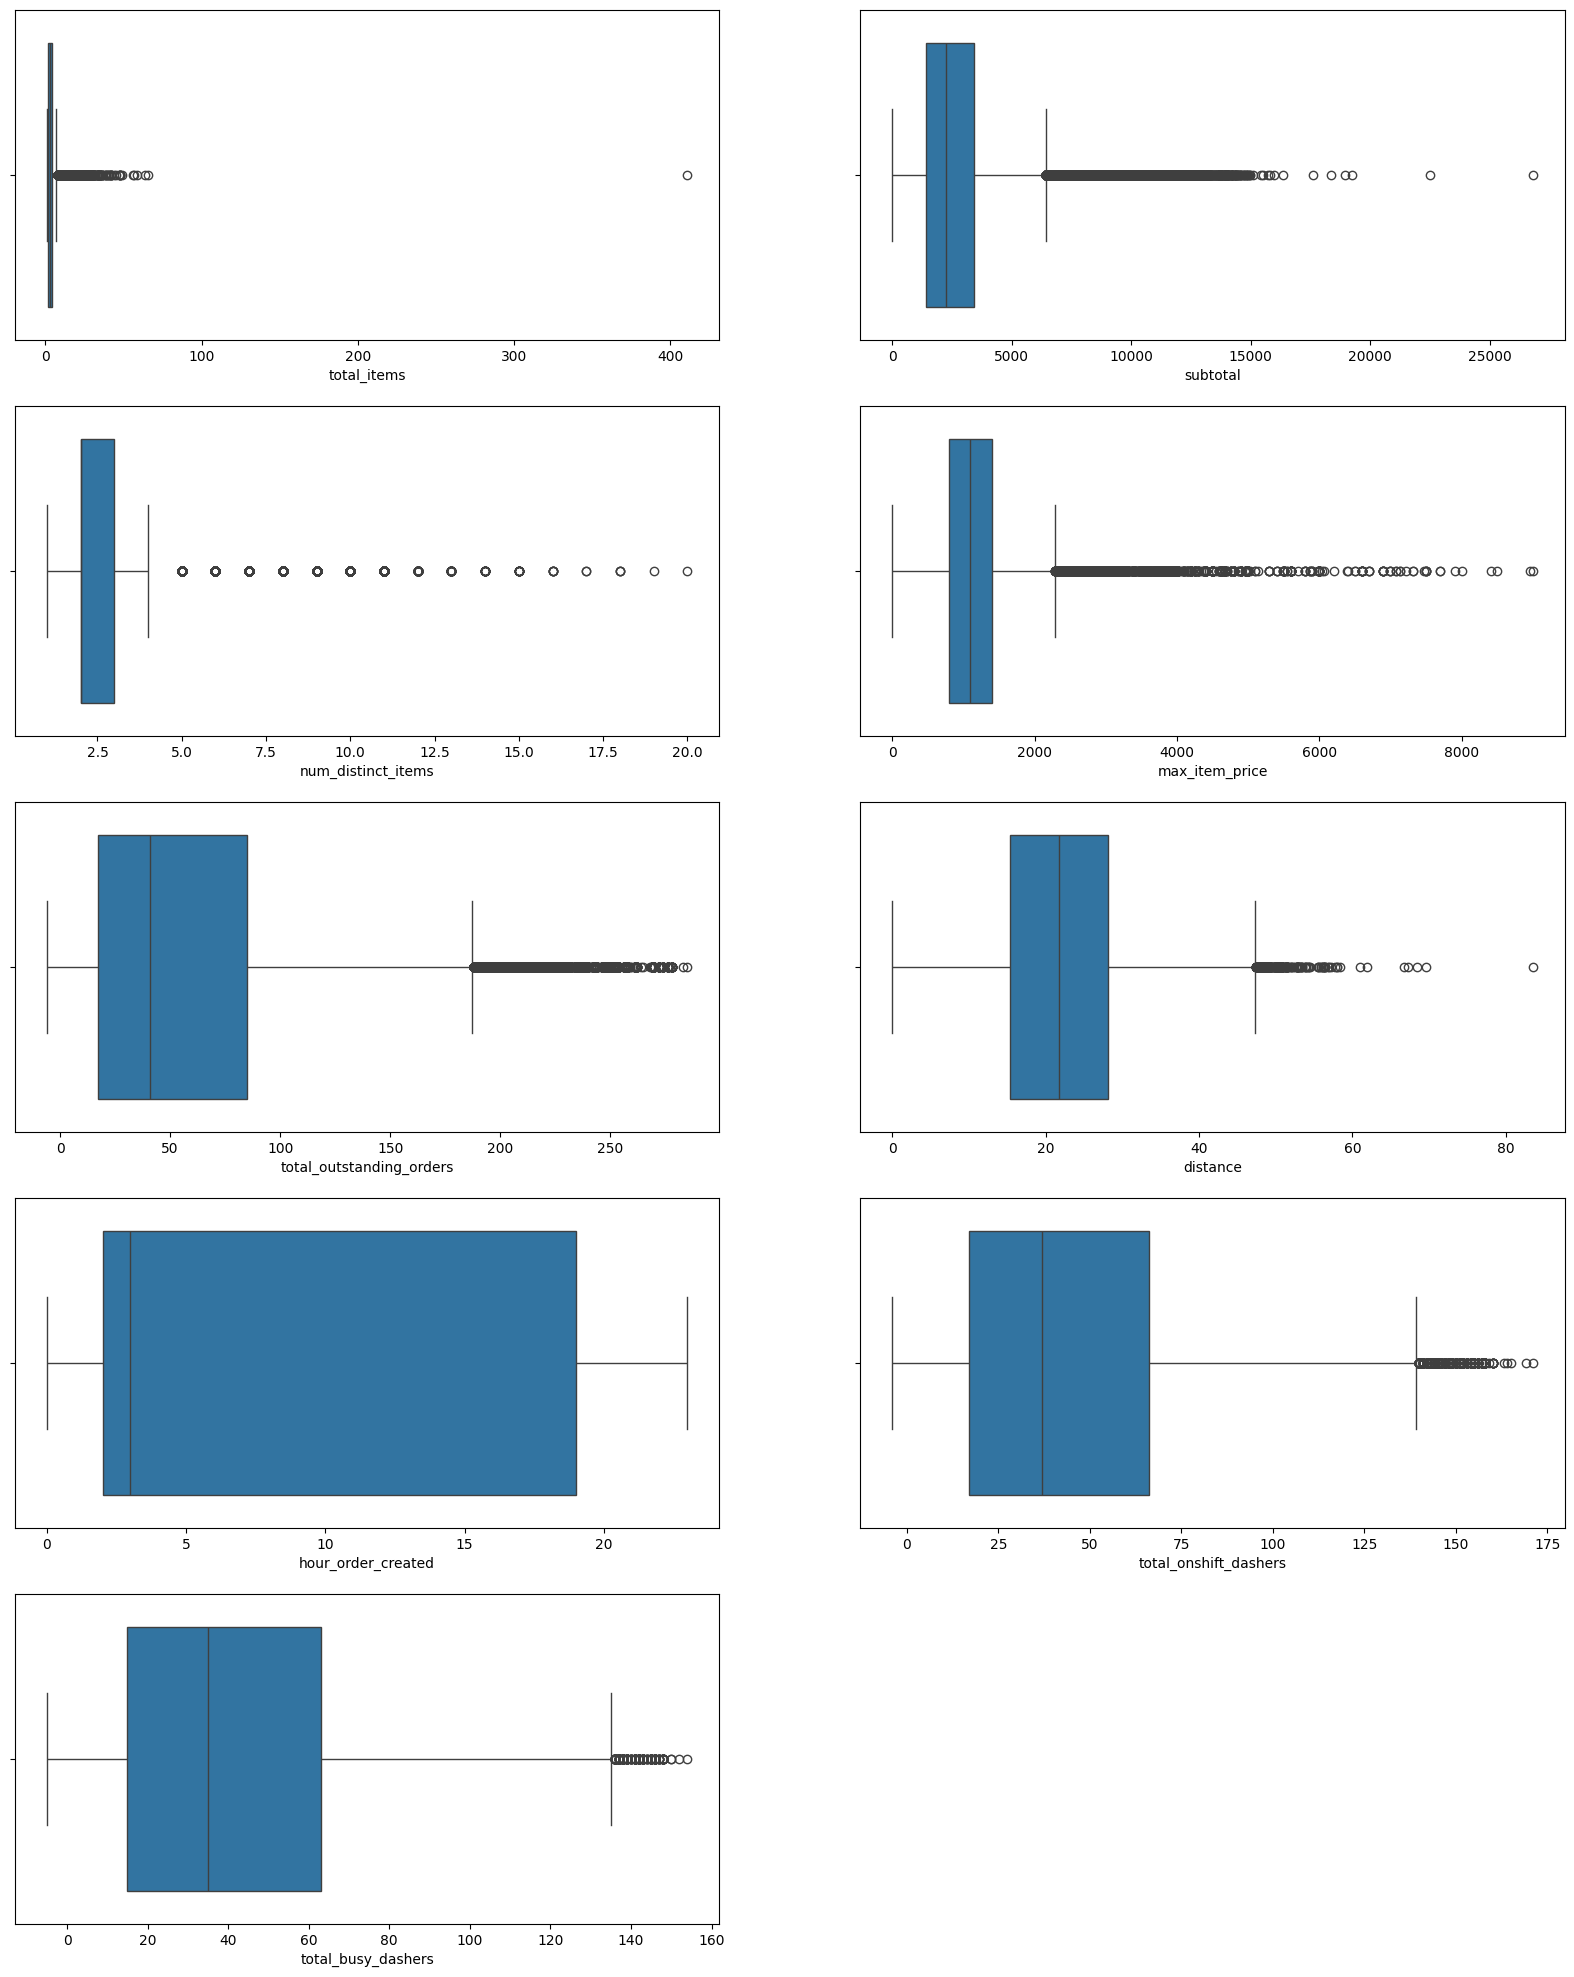

In [78]:
# Boxplot for time_taken
numerical_columns = ['total_items','subtotal','num_distinct_items','max_item_price','total_outstanding_orders','distance','hour_order_created','total_onshift_dashers','total_busy_dashers']
plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x = X_train[col])
plt.show()


In [79]:
X_train.describe()

,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour_order_created
count,140621.000000,140621.000000,140621.000000,140621.000000,140621.000000,140621.000000,140621.000000,140621.000000,140621.000000
mean,3.208582,2698.872530,2.676464,1159.948656,44.927948,41.880025,58.245148,21.841054,8.475932
std,2.727133,1830.808391,1.626023,559.693980,34.572455,32.197755,52.773640,8.751147,8.677293
min,1.000000,0.000000,1.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1418.000000,2.000000,799.000000,17.000000,15.000000,17.000000,15.320000,2.000000
50%,3.000000,2225.000000,2.000000,1095.000000,37.000000,35.000000,41.000000,21.760000,3.000000
75%,4.000000,3415.000000,3.000000,1395.000000,66.000000,63.000000,85.000000,28.120000,19.000000
max,411.000000,26800.000000,20.000000,8999.000000,171.000000,154.000000,285.000000,83.520000,23.000000


In [80]:
X_train.shape

(140621, 10)

In [81]:
X_train = X_train[-(X_train['total_outstanding_orders'] < 0)]

In [82]:
X_train = X_train[-(X_train['total_onshift_dashers'] < 0)]

In [83]:
X_train = X_train[-(X_train['total_busy_dashers'] < 0)]

In [84]:
X_train.shape

(140556, 10)

In [85]:
y_train_df = y_train_df.loc[X_train.index]

In [86]:
y_train_df.shape

(140556, 1)

In [87]:
X_dist = X_train[X_train['distance'] <= 0]

In [88]:
y_dist = y_train_df.loc[X_dist.index]

In [89]:
X_dist

,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour_order_created
31782,3.0,5,3390,4,830,11.0,7.0,12.0,0.0,18
86435,3.0,2,3490,2,1995,29.0,16.0,16.0,0.0,0
51110,1.0,4,3082,3,895,12.0,13.0,24.0,0.0,23
52095,5.0,4,1815,3,795,68.0,65.0,91.0,0.0,3
50386,1.0,3,2187,2,797,12.0,18.0,24.0,0.0,22
140320,1.0,5,7200,3,1400,30.0,34.0,38.0,0.0,4
159736,3.0,7,6875,7,1181,62.0,56.0,115.0,0.0,19
141376,5.0,4,2722,4,1199,89.0,83.0,112.0,0.0,1


In [90]:
y_dist

,total_delivery_time_mins
31782,36.0
86435,32.0
51110,37.0
52095,32.0
50386,35.0
140320,40.0
159736,52.0
141376,34.0


In [91]:
X_train = X_train[-(X_train['distance'] <= 0)]

In [92]:
y_train_df = y_train_df.loc[X_train.index]

In [93]:
X_train[(X_train['subtotal'] <= 0)]

,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour_order_created
153638,1.0,1,0,1,1050,12.0,6.0,6.0,26.80,22
988,3.0,7,0,7,1225,6.0,22.0,8.0,9.64,17
161180,3.0,2,0,2,799,28.0,20.0,23.0,17.40,21
28027,5.0,3,0,2,880,98.0,98.0,177.0,27.08,3
52370,1.0,1,0,1,600,4.0,4.0,2.0,23.60,6
...,...,...,...,...,...,...,...,...,...,...
33848,1.0,4,0,4,1199,0.0,0.0,0.0,14.80,1
24574,1.0,2,0,2,1050,2.0,2.0,3.0,35.36,18
59676,3.0,5,0,5,1900,95.0,90.0,164.0,37.04,1
88861,3.0,1,0,1,850,74.0,129.0,89.0,28.76,3


In [94]:
X_train = X_train[-(X_train['subtotal'] <= 0)]

In [95]:
y_train_df = y_train_df.loc[X_train.index]

In [96]:
X_train.describe()

,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour_order_created
count,140416.000000,140416.000000,140416.000000,140416.000000,140416.000000,140416.000000,140416.000000,140416.000000,140416.000000
mean,3.208730,2701.411022,2.676582,1159.928804,44.949529,41.899484,58.276115,21.841709,8.474775
std,2.727981,1829.902237,1.626135,559.675751,34.572239,32.195735,52.777385,8.749889,8.677064
min,1.000000,95.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000
25%,2.000000,1420.000000,2.000000,799.000000,17.000000,15.000000,17.000000,15.320000,2.000000
50%,3.000000,2225.000000,2.000000,1095.000000,37.000000,35.000000,41.000000,21.760000,3.000000
75%,4.000000,3417.000000,3.000000,1395.000000,66.000000,63.000000,85.000000,28.120000,19.000000
max,411.000000,26800.000000,20.000000,8999.000000,171.000000,154.000000,285.000000,83.520000,23.000000


In [97]:
X_train = X_train[-(X_train['max_item_price'] <= 0)]

In [98]:
X_train.describe()

,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour_order_created
count,140410.000000,140410.000000,140410.000000,140410.000000,140410.000000,140410.000000,140410.000000,140410.000000,140410.000000
mean,3.208817,2701.485058,2.676647,1159.978370,44.950288,41.900128,58.277217,21.841882,8.474582
std,2.728005,1829.900967,1.626138,559.636342,34.572562,32.196063,52.778062,8.750012,8.677050
min,1.000000,95.000000,1.000000,52.000000,0.000000,0.000000,0.000000,0.040000,0.000000
25%,2.000000,1420.000000,2.000000,799.000000,17.000000,15.000000,17.000000,15.320000,2.000000
50%,3.000000,2225.000000,2.000000,1095.000000,37.000000,35.000000,41.000000,21.760000,3.000000
75%,4.000000,3417.000000,3.000000,1395.000000,66.000000,63.000000,85.000000,28.120000,19.000000
max,411.000000,26800.000000,20.000000,8999.000000,171.000000,154.000000,285.000000,83.520000,23.000000


In [99]:
def detect_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    IQR = Q3 - Q1
    

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    

    outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
    
    return lower_bound , upper_bound

In [100]:
lower_bound,upper_bound = detect_outliers(X_train,'distance')


In [101]:
upper_bound

47.32000000000001

In [102]:
X_train[(X_train['distance'] > upper_bound)]

,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour_order_created
101074,3.0,1,1350,1,900,22.0,22.0,19.0,50.00,21
131599,1.0,4,2322,3,1005,52.0,46.0,61.0,50.60,4
109056,3.0,4,1870,3,1195,100.0,95.0,163.0,48.24,2
67299,2.0,3,1075,3,375,12.0,10.0,8.0,50.44,23
89076,1.0,3,2897,2,999,5.0,6.0,8.0,53.80,23
...,...,...,...,...,...,...,...,...,...,...
17633,1.0,2,1078,2,769,14.0,15.0,14.0,53.88,22
86365,1.0,3,3299,3,1399,39.0,29.0,32.0,47.48,1
45272,5.0,6,6775,6,1500,2.0,0.0,0.0,48.20,19
136848,1.0,1,1095,1,1095,4.0,4.0,3.0,50.88,21


In [103]:
X_train = X_train[-(X_train['distance'] > upper_bound)]

In [104]:
y_train_df = y_train_df.loc[X_train.index]

In [105]:
lower_bound,upper_bound = detect_outliers(X_train,'subtotal')

In [106]:
upper_bound

6412.5

In [107]:
X_train[(X_train['subtotal'] > 10000)]

,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour_order_created
152799,2.0,19,11415,4,1200,9.0,9.0,14.0,25.52,2
49186,3.0,12,10160,8,1500,116.0,107.0,161.0,15.92,2
118966,3.0,6,13794,6,2399,21.0,22.0,26.0,41.04,0
18530,1.0,18,12615,14,1396,32.0,37.0,43.0,23.60,19
101274,3.0,15,11948,9,1660,35.0,19.0,21.0,23.56,0
...,...,...,...,...,...,...,...,...,...,...
87922,2.0,14,12050,13,1495,80.0,62.0,114.0,26.84,1
136330,3.0,10,14285,7,1650,71.0,91.0,83.0,13.56,1
24300,3.0,16,13655,11,1295,24.0,24.0,28.0,30.28,3
17159,3.0,11,12095,10,1395,58.0,50.0,57.0,23.12,0


In [108]:
X_train = X_train[-(X_train['subtotal'] > 10000)]

In [109]:
y_train_df = y_train_df.loc[X_train.index]

In [110]:
lower_bound,upper_bound = detect_outliers(X_train,'total_outstanding_orders')

In [111]:
X_train.describe()

,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour_order_created
count,139064.000000,139064.000000,139064.000000,139064.000000,139064.000000,139064.000000,139064.000000,139064.000000,139064.000000
mean,3.148730,2631.347883,2.638512,1154.221351,44.938532,41.891633,58.258615,21.784149,8.483252
std,2.621965,1651.424950,1.553668,552.397777,34.584518,32.204157,52.785606,8.669262,8.676983
min,1.000000,95.000000,1.000000,52.000000,0.000000,0.000000,0.000000,0.040000,0.000000
25%,2.000000,1406.000000,1.000000,799.000000,17.000000,15.000000,17.000000,15.320000,2.000000
50%,3.000000,2200.000000,2.000000,1080.000000,37.000000,35.000000,41.000000,21.740000,3.000000
75%,4.000000,3390.000000,3.000000,1395.000000,66.000000,63.000000,85.000000,28.080000,19.000000
max,411.000000,10000.000000,20.000000,8999.000000,171.000000,154.000000,285.000000,47.320000,23.000000


In [112]:
X_train = X_train[-(X_train['total_outstanding_orders'] > 200)]

In [113]:
y_train_df = y_train_df.loc[X_train.index]

In [114]:
lower_bound,upper_bound = detect_outliers(X_train,'num_distinct_items')

In [115]:
X_train = X_train[-(X_train['total_items'] >50)]

In [116]:
X_train.describe()

,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour_order_created
count,136888.000000,136888.000000,136888.000000,136888.000000,136888.000000,136888.000000,136888.000000,136888.000000,136888.000000
mean,3.140158,2625.634621,2.635483,1152.391196,43.607036,40.637382,55.626446,21.776795,8.578509
std,2.355590,1650.873242,1.553202,551.611034,33.148272,30.832664,48.785367,8.673498,8.712016
min,1.000000,95.000000,1.000000,52.000000,0.000000,0.000000,0.000000,0.040000,0.000000
25%,2.000000,1400.000000,1.000000,799.000000,17.000000,15.000000,17.000000,15.320000,2.000000
50%,3.000000,2200.000000,2.000000,1079.000000,36.000000,34.000000,40.000000,21.720000,3.000000
75%,4.000000,3381.000000,3.000000,1395.000000,64.000000,61.000000,82.000000,28.080000,19.000000
max,49.000000,10000.000000,20.000000,8999.000000,171.000000,154.000000,200.000000,47.320000,23.000000


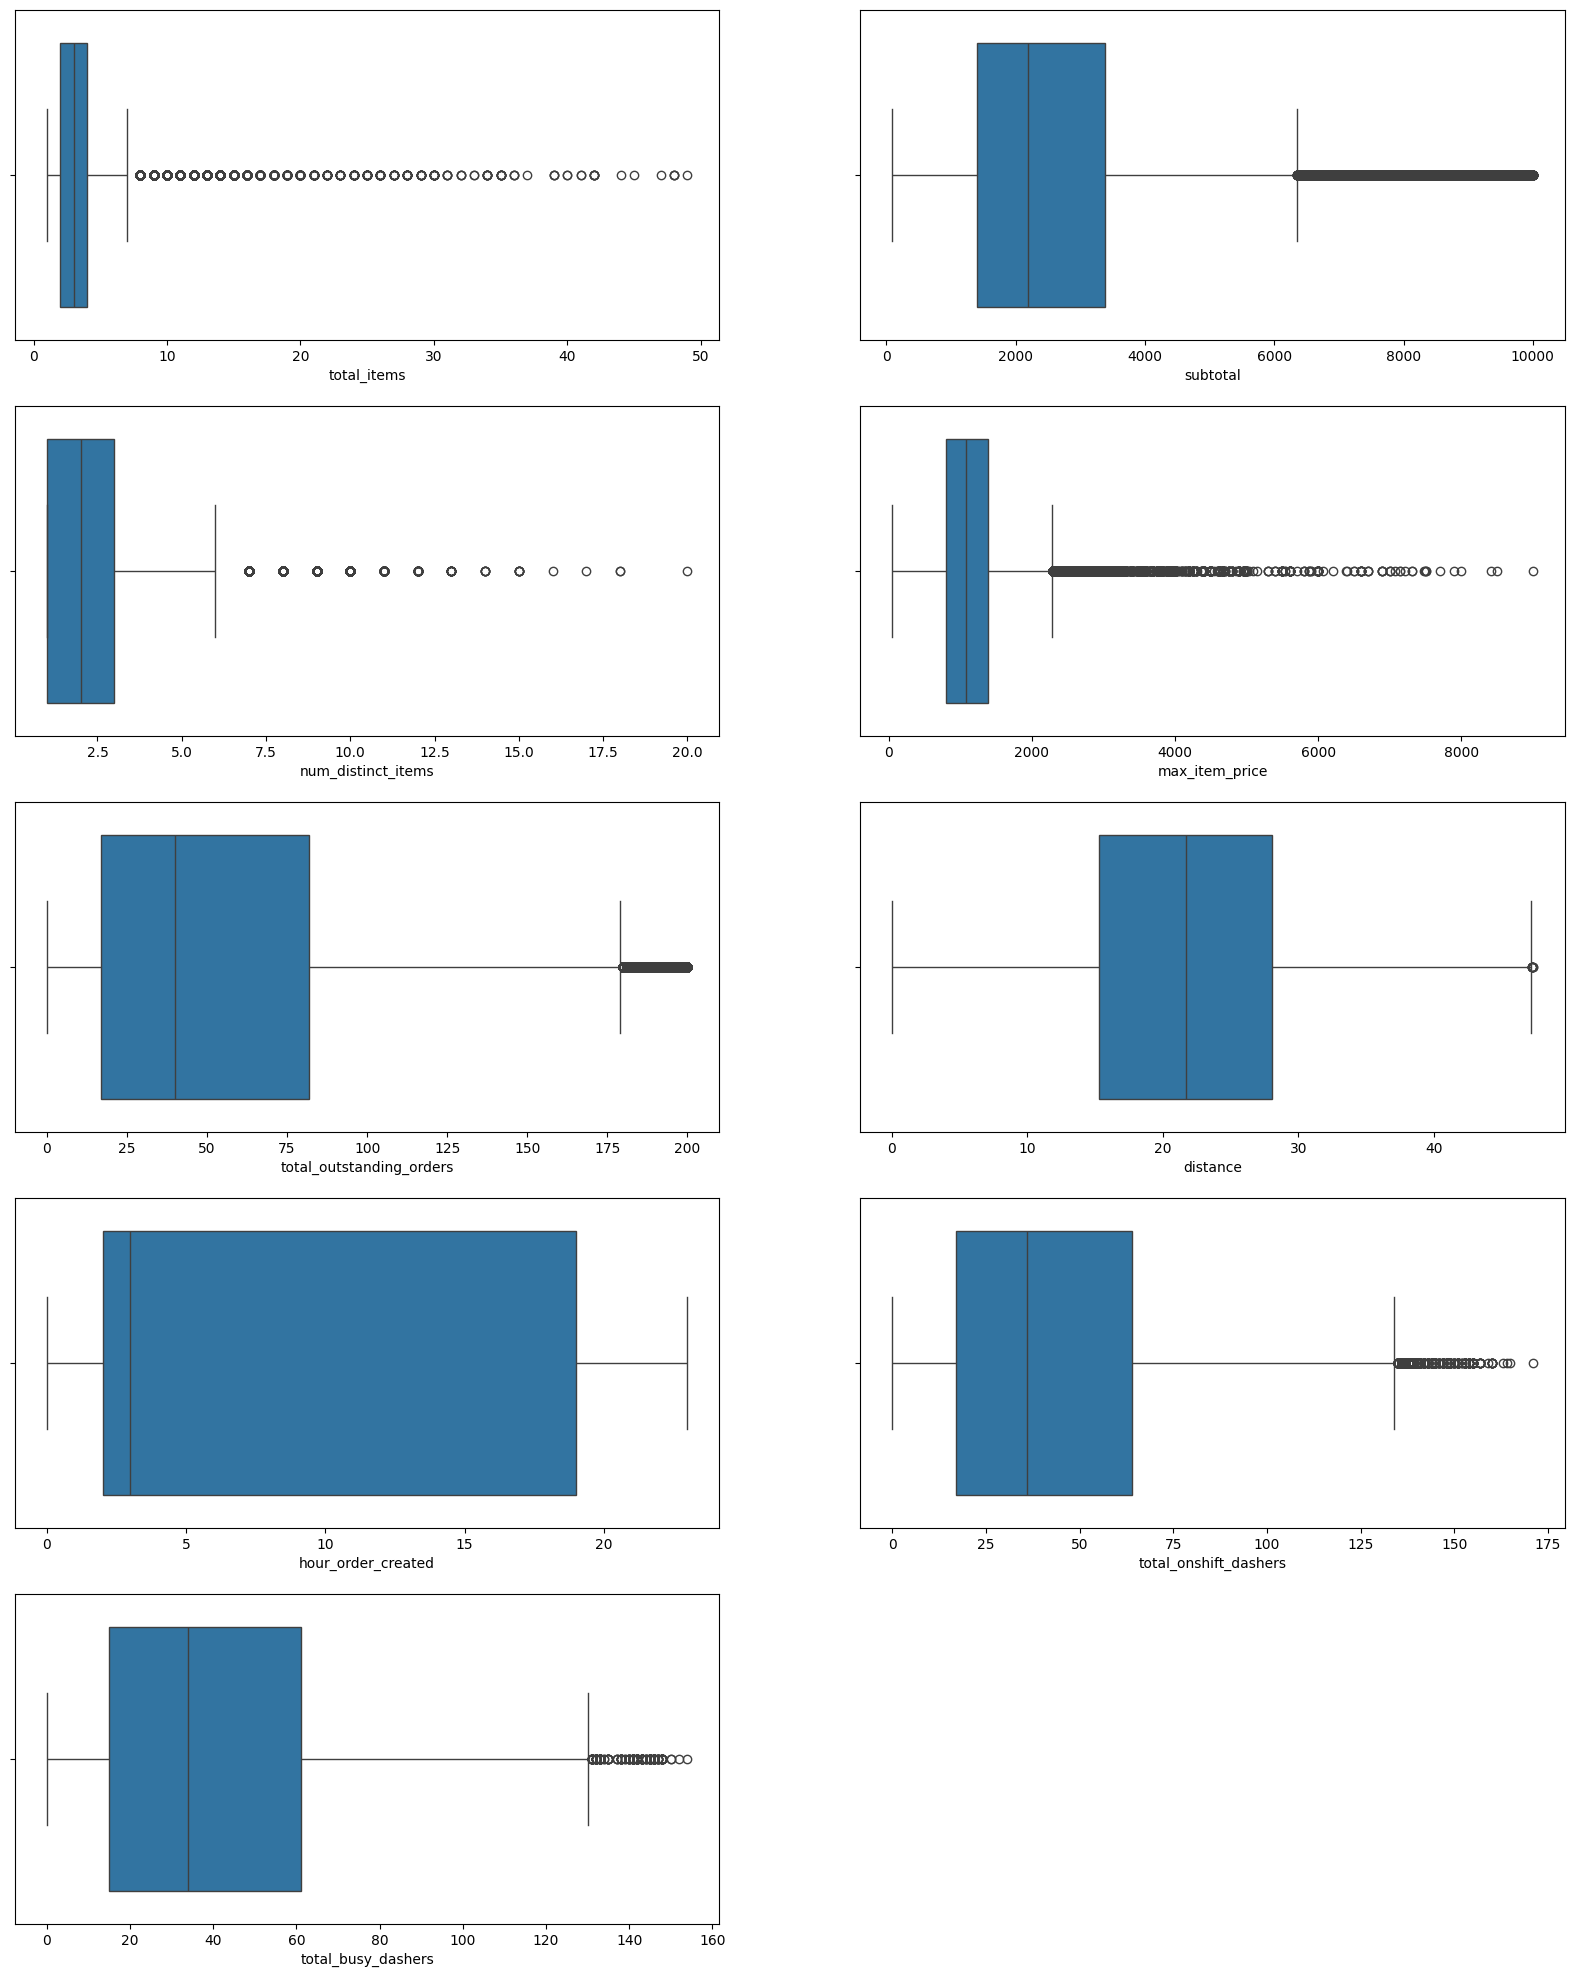

In [117]:
numerical_columns = ['total_items','subtotal','num_distinct_items','max_item_price','total_outstanding_orders','distance','hour_order_created','total_onshift_dashers','total_busy_dashers']
plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x = X_train[col])
plt.show()

In [118]:
y_train_df = y_train_df.loc[X_train.index]

<Axes: xlabel='total_delivery_time_mins'>

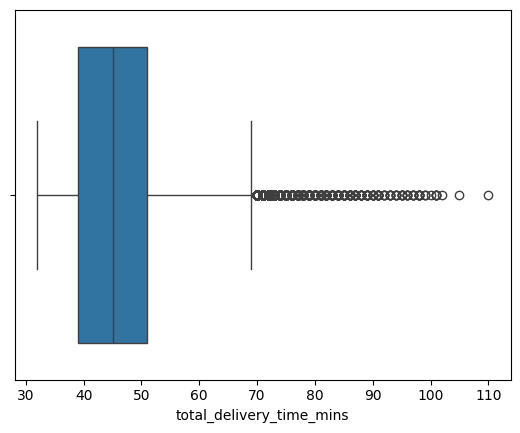

In [119]:
sns.boxplot(x = y_train_df['total_delivery_time_mins'])

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [121]:
# Handle outliers
# lower_bound,upper_bound = detect_outliers(y_train_df,'total_delivery_time_mins')


In [122]:
# y_train_df[(y_train_df['total_delivery_time_mins'] > upper_bound)].describe()

In [123]:
# y_train_df = y_train_df[-(y_train_df['total_delivery_time_mins'] > upper_bound)]

In [124]:
# X_train = X_train.loc[y_train_df.index]

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [126]:
# Define numerical and categorical columns for easy EDA and data manipulation

X_val = X_val.drop(['min_item_price','day_order_created','market_id'],axis=1)

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [129]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [131]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [133]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [135]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [137]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [140]:
# Import libraries
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [142]:
X_train

,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour_order_created
102712,2.0,1,820,1,745,35.0,39.0,56.0,30.32,21
94576,3.0,1,995,1,995,110.0,72.0,116.0,31.16,2
49784,3.0,4,2040,4,895,6.0,3.0,7.0,18.16,21
37753,1.0,2,2376,2,1399,16.0,17.0,19.0,33.44,3
91728,1.0,1,1430,1,1320,64.0,47.0,52.0,31.56,21
...,...,...,...,...,...,...,...,...,...,...
119879,5.0,1,1111,1,1111,31.0,31.0,34.0,37.04,23
103694,1.0,4,2880,3,795,95.0,80.0,111.0,27.72,3
131932,5.0,2,1799,2,899,18.0,18.0,15.0,21.92,1
146867,2.0,10,4015,4,850,26.0,24.0,28.0,23.60,3


In [143]:
# Apply scaling to the numerical columns
scaler = MinMaxScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

In [144]:
X_test_scaled = X_val.copy()
X_test_scaled[numerical_columns] = scaler.fit_transform(X_test_scaled[numerical_columns])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [148]:
# Create/Initialise the model
model = LinearRegression()

In [149]:
# Train the model using the training data
lr = model.fit(X_train_scaled,y_train_df)

In [150]:
c= lr.intercept_
c

array([36.134573])

In [151]:
lr.coef_

array([[ -4.05183371,  -2.17206679,  12.90452814,  10.25009842,
          6.02815199, -63.95535231, -21.77490402,  71.69903089,
         22.4781671 ,  -5.58821455]])

In [152]:
# Make predictions
y_pred = model.predict(X_train_scaled)

In [153]:
# Find results for evaluation metrics
mae = mean_absolute_error(y_train_df, y_pred)
mse = mean_squared_error(y_train_df, y_pred)
rmse = mse**0.5
r2 = r2_score(y_train_df, y_pred)


In [154]:
r2

0.8618936933036392

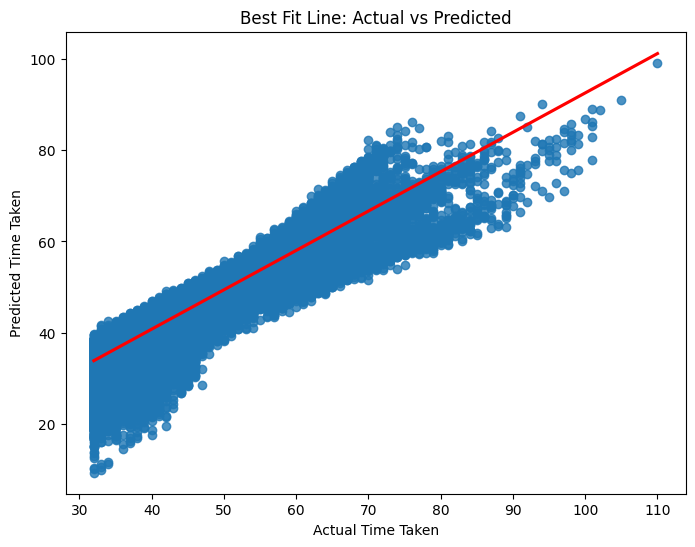

In [155]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_train_df, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual Time Taken")
plt.ylabel("Predicted Time Taken")
plt.title("Best Fit Line: Actual vs Predicted")
plt.show()

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [269]:
X_train_lm = sm.add_constant(X_train_scaled)

lr_1 = sm.OLS(y_train_df, X_train_lm).fit()

lr_1.params

const                       36.134573
order_protocol              -4.051834
total_items                 -2.172067
subtotal                    12.904528
num_distinct_items          10.250098
max_item_price               6.028152
total_onshift_dashers      -63.955352
total_busy_dashers         -21.774904
total_outstanding_orders    71.699031
distance                    22.478167
hour_order_created          -5.588215
dtype: float64

In [271]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     total_delivery_time_mins   R-squared:                       0.862
Model:                                  OLS   Adj. R-squared:                  0.862
Method:                       Least Squares   F-statistic:                 8.542e+04
Date:                      Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                              21:32:30   Log-Likelihood:            -3.5986e+05
No. Observations:                    136888   AIC:                         7.197e+05
Df Residuals:                        136877   BIC:                         7.198e+05
Df Model:                                10                                         
Covariance Type:                  nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       36.1346      0.039    922.728      0.000      36.058      36.211
order_protocol              -4.0518      0.037   -110.397      0.000      -4.124      -3.980
total_items                 -2.1721      0.329     -6.593      0.000      -2.818      -1.526
subtotal                    12.9045      0.101    127.827      0.000      12.707      13.102
num_distinct_items          10.2501      0.213     48.152      0.000       9.833      10.667
max_item_price               6.0282      0.209     28.898      0.000       5.619       6.437
total_onshift_dashers      -63.9554      0.156   -410.673      0.000     -64.261     -63.650
total_busy_dashers         -21.7749      0.145   -150.286      0.000     -22.059     -21.491
total_outstanding_orders    71.6990      0.115    622.487      0.000      71.473      71.925
distance                    22.4782      0.050    453.945      0.000      22.381      22.575
hour_order_created          -5.5882      0.026   -212.563      0.000      -5.640      -5.537
==============================================================================
Omnibus:                    43617.767   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171044.517
Skew:                           1.555   Prob(JB):                         0.00
Kurtosis:                       7.508   Cond. No.                         53.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [273]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [275]:
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_onshift_dashers,30.04
6,total_busy_dashers,27.99
7,total_outstanding_orders,22.03
3,num_distinct_items,13.41
2,subtotal,11.53
1,total_items,8.73
4,max_item_price,8.06
8,distance,5.55
0,order_protocol,4.15
9,hour_order_created,2.02


In [277]:
X_train_scaled = X_train_scaled.drop(columns=['num_distinct_items','max_item_price'])

In [377]:
X_test_scaled = X_test_scaled.drop(columns=['num_distinct_items','max_item_price'])

In [279]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_scaled.columns)
X_train_lm = sm.add_constant(X_train_scaled)

lr_2 = sm.OLS(y_train_df, X_train_lm).fit()

lr_2.params

const                       36.651573
order_protocol              -4.157908
total_items                  4.698837
subtotal                    16.195590
total_onshift_dashers      -63.948728
total_busy_dashers         -21.772741
total_outstanding_orders    71.720622
distance                    22.509660
hour_order_created          -5.667254
dtype: float64

In [281]:
print(lr_2.summary())

                               OLS Regression Results                               
Dep. Variable:     total_delivery_time_mins   R-squared:                       0.859
Model:                                  OLS   Adj. R-squared:                  0.859
Method:                       Least Squares   F-statistic:                 1.044e+05
Date:                      Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                              21:36:25   Log-Likelihood:            -3.6119e+05
No. Observations:                    136888   AIC:                         7.224e+05
Df Residuals:                        136879   BIC:                         7.225e+05
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [283]:
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_onshift_dashers,29.86
4,total_busy_dashers,27.91
5,total_outstanding_orders,21.98
2,subtotal,4.57
6,distance,4.48
1,total_items,2.68
0,order_protocol,2.48
7,hour_order_created,1.88


In [285]:
X_train_lm = sm.add_constant(X_train_scaled)

lr_3 = sm.OLS(y_train_df, X_train_lm).fit()

lr_3.params

const                       36.651573
order_protocol              -4.157908
total_items                  4.698837
subtotal                    16.195590
total_onshift_dashers      -63.948728
total_busy_dashers         -21.772741
total_outstanding_orders    71.720622
distance                    22.509660
hour_order_created          -5.667254
dtype: float64

In [287]:
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_onshift_dashers,29.86
4,total_busy_dashers,27.91
5,total_outstanding_orders,21.98
2,subtotal,4.57
6,distance,4.48
1,total_items,2.68
0,order_protocol,2.48
7,hour_order_created,1.88


Index(['total_onshift_dashers'], dtype='object')
Index(['total_onshift_dashers', 'total_outstanding_orders'], dtype='object')
Index(['total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders'],
      dtype='object')
Index(['total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance'],
      dtype='object')
Index(['subtotal', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance'],
      dtype='object')
Index(['subtotal', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour_order_created'],
      dtype='object')
Index(['total_items', 'subtotal', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'hour_order_created'],
      dtype='object')
Index(['order_protocol', 'total_items', 'subtotal', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'hour_order

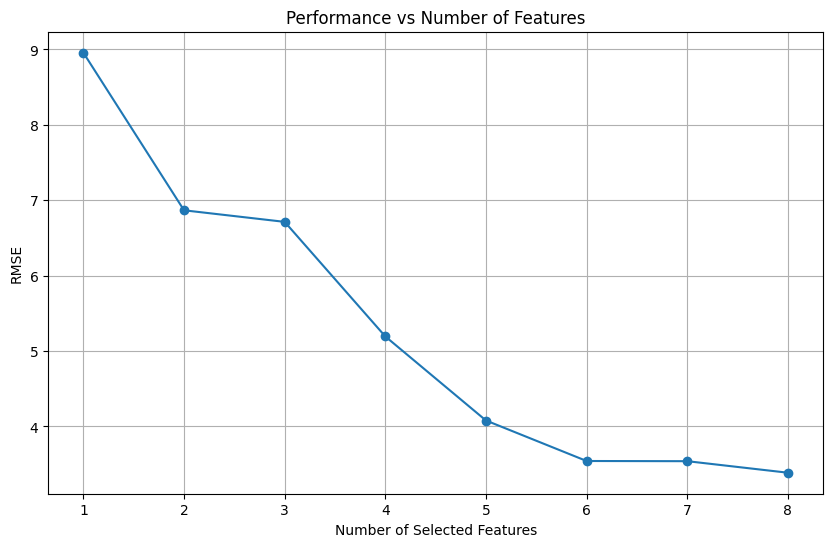

In [289]:
n_features = X_train_scaled.shape[1]
rmse_list = []
feature_counts = list(range(1, n_features + 1))

for i in feature_counts:
    rfe = RFE(estimator=model, n_features_to_select=i)
    rfe.fit(X_train_scaled, y_train_df)    
    selected_features = X_train_scaled.columns[rfe.support_]    
    model.fit(X_train_scaled[selected_features], y_train_df)
    y_pred = model.predict(X_train_scaled[selected_features])
    rmse = mean_squared_error(y_train_df, y_pred, squared=False)    
    rmse_list.append(rmse)
    print(selected_features)
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, rmse_list,marker = 'o')
plt.xlabel("Number of Selected Features")
plt.ylabel("RMSE")
plt.title("Performance vs Number of Features")
plt.grid(True)
plt.show()

In [293]:
# Build the final model with selected number of features
optimal_num = feature_counts[np.argmin(rmse_list)]
optimal_num

8

In [295]:
X_train_scaled

,order_protocol,total_items,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour_order_created
102712,0.166667,0.000000,0.073195,0.204678,0.253247,0.280,0.640440,0.913043
94576,0.333333,0.000000,0.090863,0.643275,0.467532,0.580,0.658206,0.086957
49784,0.333333,0.062500,0.196365,0.035088,0.019481,0.035,0.383249,0.913043
37753,0.000000,0.020833,0.230288,0.093567,0.110390,0.095,0.706430,0.130435
91728,0.000000,0.000000,0.134780,0.374269,0.305195,0.260,0.666667,0.913043
...,...,...,...,...,...,...,...,...
119879,0.666667,0.000000,0.102574,0.181287,0.201299,0.170,0.782572,1.000000
103694,0.000000,0.062500,0.281171,0.555556,0.519481,0.555,0.585448,0.130435
131932,0.666667,0.020833,0.172034,0.105263,0.116883,0.075,0.462775,0.043478
146867,0.166667,0.187500,0.395760,0.152047,0.155844,0.140,0.498308,0.130435


In [297]:
# Create/Initialise the model
model = LinearRegression()

In [299]:
# Train the model using the training data
lr_final = model.fit(X_train_scaled,y_train_df)

In [301]:
c= lr_final.intercept_
c

array([36.651573])

In [303]:
lr_final.coef_

array([[ -4.15790785,   4.69883706,  16.19559037, -63.94872818,
        -21.77274083,  71.72062234,  22.5096598 ,  -5.66725389]])

In [305]:
# Make predictions
y_pred = model.predict(X_train_scaled)

In [307]:
type(y_pred)

numpy.ndarray

In [309]:
# Find results for evaluation metrics
mae = mean_absolute_error(y_train_df, y_pred)
mse = mean_squared_error(y_train_df, y_pred)
rmse = mse**0.5
r2 = r2_score(y_train_df, y_pred)


In [311]:
r2

0.8591744129446743

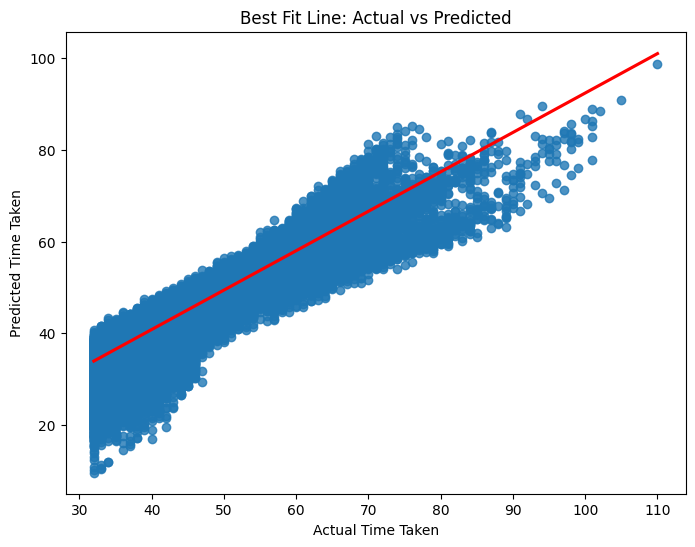

In [313]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_train_df, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual Time Taken")
plt.ylabel("Predicted Time Taken")
plt.title("Best Fit Line: Actual vs Predicted")
plt.show()

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [315]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = y_train_df - y_pred 


In [317]:
residuals

,total_delivery_time_mins
102712,-2.864644
94576,1.657726
49784,3.965852
37753,-3.067866
91728,0.265180
...,...
119879,-0.705699
103694,-2.905379
131932,-3.036965
146867,-0.651252


Text(0.5, 0, 'Errors')

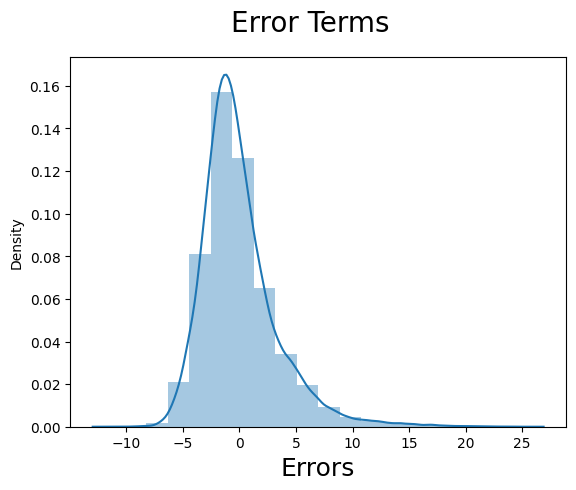

In [319]:
fig = plt.figure()
sns.distplot((residuals), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)     

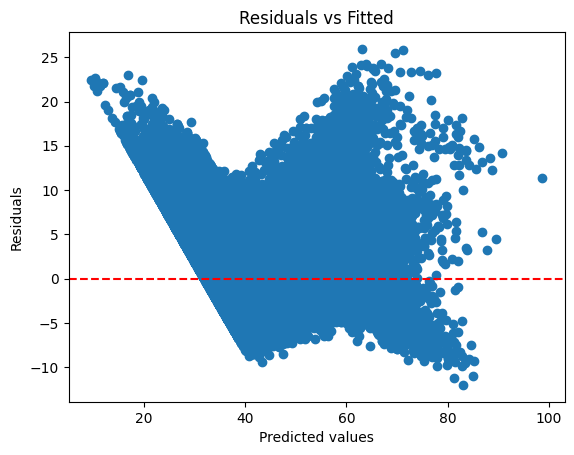

In [321]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

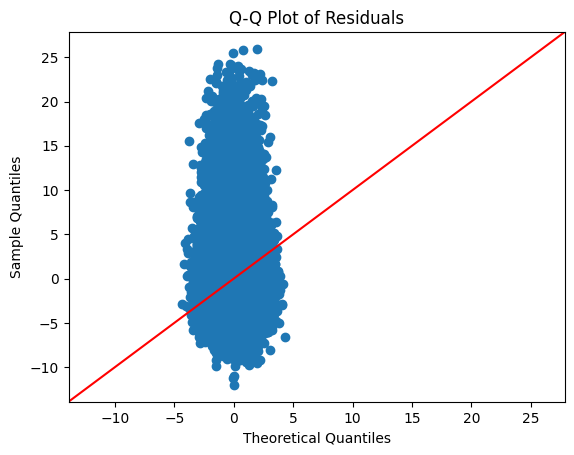

In [323]:
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [325]:
X_test_scaled 

,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour_order_created,isWeekend
50609,39,1.0,0.06,0.127568,0.200000,0.074762,0.335294,0.354839,0.248227,0.490985,0.086957,0
49181,25,3.0,0.04,0.156265,0.066667,0.088435,0.605882,0.651613,0.695035,0.408460,0.086957,0
4526,46,1.0,0.00,0.058919,0.000000,0.081565,0.052941,0.058065,0.035461,0.253121,0.217391,0
131,13,4.0,0.08,0.078133,0.200000,0.029932,0.029412,0.045161,0.028369,0.444521,0.956522,0
57096,58,5.0,0.10,0.180835,0.133333,0.051020,0.064706,0.025806,0.017730,0.278779,0.826087,1
...,...,...,...,...,...,...,...,...,...,...,...,...
66574,50,3.0,0.08,0.088452,0.200000,0.056122,0.570588,0.612903,0.517730,0.536061,0.130435,1
33251,55,3.0,0.06,0.163931,0.133333,0.108095,0.211765,0.206452,0.131206,0.191401,0.086957,0
76943,13,5.0,0.04,0.093366,0.133333,0.088435,0.223529,0.238710,0.106383,0.140777,0.043478,0
43932,53,3.0,0.02,0.105061,0.066667,0.104558,0.423529,0.425806,0.315603,0.203883,0.956522,0


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [354]:
# Compare the scaled vs unscaled features used in the final model



model = LinearRegression()


model.fit(X_train_scaled, y_train_df)
unscaled_coeff = model.coef_


model.fit(X_train_scaled, y_train_df)
scaled_coeff = model.coef_




In [356]:
unscaled_coeff = np.array(unscaled_coeff).flatten()  
scaled_coeff = np.array(scaled_coeff).flatten() 

In [358]:
X_train.shape

(136888, 10)

In [360]:
X_train_scaled.shape

(136888, 8)

In [362]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136888 entries, 102712 to 121958
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_protocol            136888 non-null  float64
 1   total_items               136888 non-null  float64
 2   subtotal                  136888 non-null  float64
 3   total_onshift_dashers     136888 non-null  float64
 4   total_busy_dashers        136888 non-null  float64
 5   total_outstanding_orders  136888 non-null  float64
 6   distance                  136888 non-null  float64
 7   hour_order_created        136888 non-null  float64
dtypes: float64(8)
memory usage: 9.4 MB


In [368]:
features = ['total_items','subtotal','total_outstanding_orders','distance','total_onshift_dashers','total_busy_dashers','order_protocol','hour_order_created']

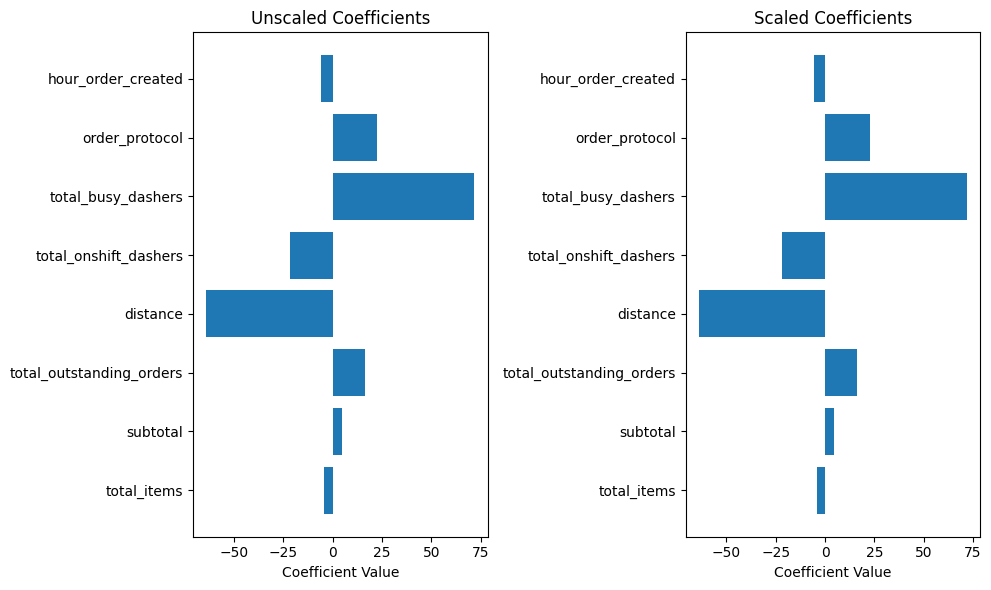

In [370]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.barh(features, unscaled_coeff)
plt.title('Unscaled Coefficients')
plt.xlabel('Coefficient Value')


plt.subplot(1, 2, 2)
plt.barh(features, scaled_coeff)
plt.title('Scaled Coefficients')
plt.xlabel('Coefficient Value')

plt.tight_layout()
plt.show()

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [372]:
# Analyze the effect of a unit change in a feature, say 'total_items'
print("Unscaled Coefficients:", unscaled_coeff)
print("Scaled Coefficients:", scaled_coeff)



Unscaled Coefficients: [ -4.15790785   4.69883706  16.19559037 -63.94872818 -21.77274083
  71.72062234  22.5096598   -5.66725389]
Scaled Coefficients: [ -4.15790785   4.69883706  16.19559037 -63.94872818 -21.77274083
  71.72062234  22.5096598   -5.66725389]


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

In [381]:
X_test_scaled

,store_primary_category,order_protocol,total_items,subtotal,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,hour_order_created,isWeekend
50609,39,1.0,0.06,0.127568,0.335294,0.354839,0.248227,0.490985,0.086957,0
49181,25,3.0,0.04,0.156265,0.605882,0.651613,0.695035,0.408460,0.086957,0
4526,46,1.0,0.00,0.058919,0.052941,0.058065,0.035461,0.253121,0.217391,0
131,13,4.0,0.08,0.078133,0.029412,0.045161,0.028369,0.444521,0.956522,0
57096,58,5.0,0.10,0.180835,0.064706,0.025806,0.017730,0.278779,0.826087,1
...,...,...,...,...,...,...,...,...,...,...
66574,50,3.0,0.08,0.088452,0.570588,0.612903,0.517730,0.536061,0.130435,1
33251,55,3.0,0.06,0.163931,0.211765,0.206452,0.131206,0.191401,0.086957,0
76943,13,5.0,0.04,0.093366,0.223529,0.238710,0.106383,0.140777,0.043478,0
43932,53,3.0,0.02,0.105061,0.423529,0.425806,0.315603,0.203883,0.956522,0


In [385]:
X_test_scaled = X_test_scaled.drop(columns=['isWeekend','store_primary_category'])

In [389]:
y_val_df = pd.DataFrame(y_val)

In [391]:
y_val_df = y_val_df.loc[X_test_scaled.index]

In [393]:
y_pred_test = model.predict(X_test_scaled)

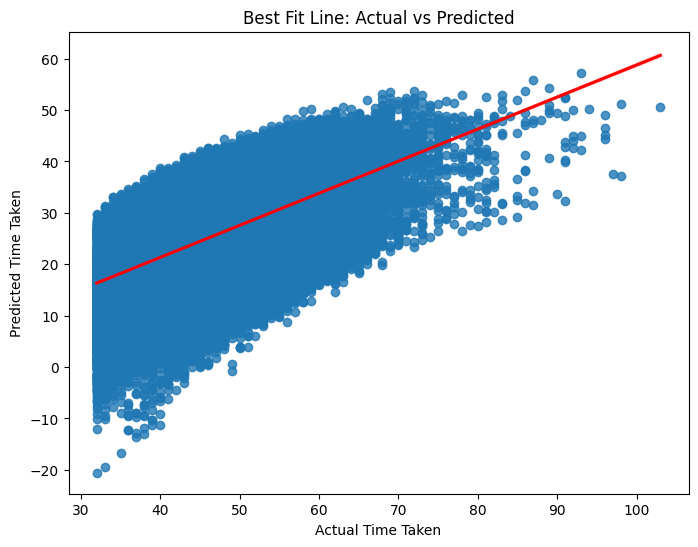

In [397]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_val_df, y=y_pred_test, line_kws={"color": "red"})
plt.xlabel("Actual Time Taken")
plt.ylabel("Predicted Time Taken")
plt.title("Best Fit Line: Actual vs Predicted")
plt.show()

In [415]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_scaled.columns)
X_test_lm = sm.add_constant(X_test_scaled)

lr_2 = sm.OLS(y_val_df, X_test_lm).fit()

lr_2.params

const                       37.103021
order_protocol              -0.673802
total_items                  4.938698
subtotal                    32.450034
total_onshift_dashers      -62.574531
total_busy_dashers         -21.562961
total_outstanding_orders    98.873457
distance                    27.432803
hour_order_created          -5.780661
dtype: float64

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

market_id, store_primary_category, order_protocol are the categorical variables all these three variables have very least correlation with the target variable so they have least effect on dependent varibale.





##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

test_size = 0.2, means using 20% of the data for testing and 80%  data for training.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

Distance has the highest correlation with the target variable, it has the correlation value of 0.46





##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


Linear Regression is a supervised learning model used to model data which has linear relationship between dependent and independent variable.This model follows the y = mx + c straight line equation, The coefficients in this equation explains the effect of independent variable on the dependent variable. Our object in this model is to minimise the cost function that is the diffrence between actual and predicted values by adjusting the values of these coefficients using the gradient descent method to find the best fit line for better predictions of the model.

##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

In simple linear regression it establishes relationship between one independent variable and one dependent variable

In Multiple linear regression it establishes relationship between two or more independent variable and one dependent variable


##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


Cost function is the difference between actual and predicted values in a model it is a measure of determining the performance of model lower the value of cost function better the model prediction. To lower the cost function we have to find the best fit line by adjusting the weight and bias using Gradient descent method



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

Over Fitting:

The model is overfitted, when it learns the training data entirely along with noise,so it fails in understanding the underlying generalized patterns and memorizes on training data, this results in poor predictions on unseen data.

Under Fitting:

The model is underfitted, when it learns the training data itself very poorly which results in poor prediction of both training and testing data set.This means the model doesn't learn enough from the data and struggles to generalize

##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

Residual Plot establishes the relationship between residuals and independent variable. It determines whether the linear model fives better prediction for the data. If residuals randomly scattered around zero then it can be confirmed that the model is a good fit. Non random distributions of residuals is not a good sign.